5


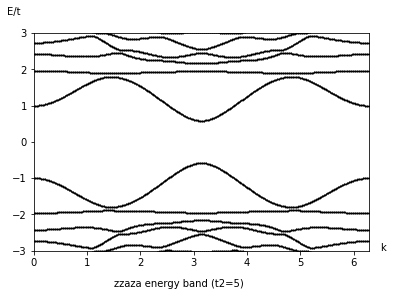

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath 
import functools

def sz(spin):
#turn spin number into z projection of spin
    if spin == 0 : 
    #spin up
        return 1
    if spin == 1 :
    #spin down
        return -1
    else :
        print("Wrong spin.")

def zigzagsubcell(N,t,t2):
    global Ham
    global z
    #inside chain-z
    for spin in range(2):
        #intra two-atom unit
        for m in range(N):
            Ham[4*N*(z+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*m+2*1+spin] = t
        #inter two-atom unit
        for m in range(N-1):
            #Nearest hopping
            Ham[4*N*(z+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*(m+1)+2*0+spin] = t
            #Second-nearest hopping
            Ham[4*N*(z+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*(m+1)+2*0+spin] = 1j* t2 * sz(spin)
            Ham[4*N*(z+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*(m+1)+2*1+spin] = -1j* t2 * sz(spin)
    z = z + 1

def armchairsubcell(N,t,t2):
    global Ham
    global a
    #intra a 
    for spin in range(2):
        #hopping inside the left chain
        #intra two-atom unit
        for m in range(N):
            Ham[4*N*(z+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*m+2*1+spin] = t
        #inter two-atom unit
        for m in range(N-1):
            #Nearest hopping
            Ham[4*N*(z+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*(m+1)+2*0+spin] = t
            #Second-nearest hopping
            Ham[4*N*(z+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*(m+1)+2*0+spin] = 1j* t2 * sz(spin)
            Ham[4*N*(z+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*(m+1)+2*1+spin] = -1j* t2 * sz(spin)
        
        #hopping inside the right chain
        #intra two-atom unit
        for m in range(N):
            Ham[4*N*(z+2*a+1)+4*m+2*0+spin, 4*N*(z+2*a+1)+4*m+2*1+spin] = t
        #inter two-atom unit
        for m in range(N-1):
            #Nearest hopping
            Ham[4*N*(z+2*a+1)+4*m+2*1+spin, 4*N*(z+2*a+1)+4*(m+1)+2*0+spin] = t
            #Second-nearest hopping
            Ham[4*N*(z+2*a+1)+4*m+2*0+spin, 4*N*(z+2*a+1)+4*(m+1)+2*0+spin] = -1j* t2 * sz(spin)
            Ham[4*N*(z+2*a+1)+4*m+2*1+spin, 4*N*(z+2*a+1)+4*(m+1)+2*1+spin] = 1j* t2 * sz(spin)
    
        #hopping between chains
        #Nearest hopping
        for m in range(N):
            Ham[4*N*(z+2*a)+4*m+2*0+spin, 4*N*(z+2*a+1)+4*m+2*0+spin] = t
        #Second-nearest hopping
        for m in range(N):
            Ham[4*N*(z+2*a)+4*m+2*0+spin, 4*N*(z+2*a+1)+4*m+2*1+spin] = -1j* t2 * sz(spin)
            Ham[4*N*(z+2*a)+4*m+2*1+spin, 4*N*(z+2*a+1)+4*m+2*0+spin] = -1j* t2 * sz(spin)
        for m in range(N-1):
            Ham[4*N*(z+2*a)+4*(m+1)+2*0+spin, 4*N*(z+2*a+1)+4*m+2*1+spin] = 1j* t2 * sz(spin)
            Ham[4*N*(z+2*a)+4*m+2*1+spin, 4*N*(z+2*a+1)+4*(m+1)+2*0+spin] = 1j* t2 * sz(spin)
    
    a = a + 1
    
def zigzagintersc(N,t,t2):
    #z-z or a-z inter sub-cell
    global Ham
    for spin in range(2):
        #Nearest hopping
        for m in range(N):
            Ham[4*N*(z-1+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*m+2*1+spin] = t
        #second-nearest hopping
        for m in range(N):
            Ham[4*N*(z-1+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*m+2*0+spin] = 1j* t2 * sz(spin)
            Ham[4*N*(z-1+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*m+2*1+spin] = -1j* t2 * sz(spin)
        for m in range(N-1):
            Ham[4*N*(z-1+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*(m+1)+2*0+spin] = -1j* t2 * sz(spin)
            Ham[4*N*(z-1+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*(m+1)+2*1+spin] = 1j* t2 * sz(spin)
            
def armchairintersc(N,t,t2):
    #a-a or z-a inter sub-cell
    global Ham
    for spin in range(2):
        #Nearest hopping
        for m in range(N):
            Ham[4*N*(z-1+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*m+2*1+spin] = t
        #second-nearest hopping
        for m in range(N):
            Ham[4*N*(z-1+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*m+2*1+spin] = 1j* t2 * sz(spin)
            Ham[4*N*(z-1+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*m+2*0+spin] = 1j* t2 * sz(spin)
            
        for m in range(N-1):
            Ham[4*N*(z-1+2*a)+4*(m+1)+2*0+spin, 4*N*(z+2*a)+4*m+2*1+spin] = -1j* t2 * sz(spin)
            Ham[4*N*(z-1+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*(m+1)+2*0+spin] = -1j* t2 * sz(spin)

def SharedHam(N,t,t2,zmax,amax,bound):
    global z
    global a
    z = 0
    a = 0
    
    global Ham
    
    Ham = np.zeros((4*N*(zmax+2*amax),4*N*(zmax+2*amax)),dtype = complex)
    
    ll = len(bound)
    print(ll)
    
    for i in range(ll-1):
        if bound[i] == 'z':
            zigzagsubcell(N,t,t2)        
            zigzagintersc(N,t,t2)
        if bound[i] == 'a':
            armchairsubcell(N,t,t2)
            armchairintersc(N,t,t2)
            
    if bound[ll-1] == 'z':
        zigzagsubcell(N,t,t2)
    if bound[ll-1] == 'a':
        armchairsubcell(N,t,t2)
        
    Ham = Ham + Ham.conj().T
    
def armchairic(N,t,t2,k,zmax,amax):
    global H1
    for spin in range(2):
            #Nearest hopping
            for m in range(N):
                H1[4*N*(zmax-1+2*amax)+4*m+2*1+spin, 0+4*m+2*1+spin] = t* cmath.exp(k*1j)
            #second-nearest hopping
            for m in range(N):
                H1[4*N*(zmax-1+2*amax)+4*m+2*0+spin, 0+4*m+2*1+spin] = 1j* t2 * sz(spin)* cmath.exp(k*1j)
                H1[4*N*(zmax-1+2*amax)+4*m+2*1+spin, 0+4*m+2*0+spin] = 1j* t2 * sz(spin)* cmath.exp(k*1j)
                
            for m in range(N-1):
                H1[4*N*(zmax-1+2*amax)+4*(m+1)+2*0+spin, 0+4*m+2*1+spin] = -1j* t2 * sz(spin)* cmath.exp(k*1j)
                H1[4*N*(zmax-1+2*amax)+4*m+2*1+spin, 0+4*(m+1)+2*0+spin] = -1j* t2 * sz(spin)* cmath.exp(k*1j)
    H1 = H1 + H1.conj().T
    
def zigzagic(N,t,t2,k,zmax,amax):
    global H1
    for spin in range(2):
        #Nearest hopping
        for m in range(N):
            H1[4*N*(zmax-1+2*amax)+4*m+2*0+spin, 0+4*m+2*1+spin] = t * cmath.exp(k*1j)
        #second-nearest hopping
        for m in range(N):
            H1[4*N*(zmax-1+2*amax)+4*m+2*0+spin, 0+4*m+2*0+spin] = 1j* t2 * sz(spin)* cmath.exp(k*1j) 
            H1[4*N*(zmax-1+2*amax)+4*m+2*1+spin, 0+4*m+2*1+spin] = -1j* t2 * sz(spin)* cmath.exp(k*1j)
        for m in range(N-1):
            H1[4*N*(zmax-1+2*amax)+4*m+2*0+spin, 0+4*(m+1)+2*0+spin] = -1j* t2 * sz(spin) * cmath.exp(k*1j)
            H1[4*N*(zmax-1+2*amax)+4*m+2*1+spin, 0+4*(m+1)+2*1+spin] = 1j* t2 * sz(spin)* cmath.exp(k*1j)
    H1 = H1 + H1.conj().T
    
def KMHam(N,t,t2,k,zmax,amax,bound):
    
    global Ham
    global H1
    
    H1 = np.zeros((4*N*(zmax+2*amax),4*N*(zmax+2*amax)),dtype = complex)
    H0 = np.zeros((4*N*(zmax+2*amax),4*N*(zmax+2*amax)),dtype = complex)
    
    #inter cell
    if bound[-1] == 'a':
        armchairic(N,t,t2,k,zmax,amax)
    if bound[-1] == 'z':
        zigzagic(N,t,t2,k,zmax,amax)
        
    H0 = Ham + H1
    EE,v = np.linalg.eig(H0)
    return EE

def zcheck(bound):
    ll = len(bound)
    num = 0
    
    for i in range(ll):
        if bound[i] == 'z':
            num = num + 1
    
    return num

def main():
    #zmax,amax:the number of subcell
    #global zmax
    #global amax
    bound = ('z','z','a','z','a')
    zmax = zcheck(bound)
    amax = len(bound)-zmax
    
    N = 3
    n = 500
    
    t = 1
    t2 = 0.03
    
    kk = np.linspace(0, 2*cmath.pi, n)
    E = np.zeros((n,4*N*(zmax+2*amax)),dtype = complex)
    
    SharedHam(N,t,t2,zmax,amax,bound)
    
    for i in range(n):
        E[i] = KMHam(N,t,t2,kk[i],zmax,amax,bound)
        
    
    plt.text(1.5,-4,'zzaza energy band (t2=5)')
    plt.text(6.5,-3,'k')
    plt.text(-0.5,3.5,'E/t')
    plt.xlim(0,2*cmath.pi)
    plt.ylim(-3,3)
    plt.plot(kk,E.real,'k.',markersize=1)
    plt.savefig("zaaa.png")
    plt.show()
    
if __name__ == '__main__':
    main()
   
    

计算同种边界不同N的gap

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath 
import functools

def sz(spin):
#turn spin number into z projection of spin
    if spin == 0 : 
    #spin up
        return 1
    if spin == 1 :
    #spin down
        return -1
    else :
        print("Wrong spin.")

def zigzagsubcell(N,t,t2):
    global Ham
    global z
    #inside chain-z
    for spin in range(2):
        #intra two-atom unit
        for m in range(N):
            Ham[4*N*(z+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*m+2*1+spin] = t
        #inter two-atom unit
        for m in range(N-1):
            #Nearest hopping
            Ham[4*N*(z+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*(m+1)+2*0+spin] = t
            #Second-nearest hopping
            Ham[4*N*(z+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*(m+1)+2*0+spin] = 1j* t2 * sz(spin)
            Ham[4*N*(z+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*(m+1)+2*1+spin] = -1j* t2 * sz(spin)
    z = z + 1

def armchairsubcell(N,t,t2):
    global Ham
    global a
    #intra a 
    for spin in range(2):
        #hopping inside the left chain
        #intra two-atom unit
        for m in range(N):
            Ham[4*N*(z+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*m+2*1+spin] = t
        #inter two-atom unit
        for m in range(N-1):
            #Nearest hopping
            Ham[4*N*(z+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*(m+1)+2*0+spin] = t
            #Second-nearest hopping
            Ham[4*N*(z+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*(m+1)+2*0+spin] = 1j* t2 * sz(spin)
            Ham[4*N*(z+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*(m+1)+2*1+spin] = -1j* t2 * sz(spin)
        
        #hopping inside the right chain
        #intra two-atom unit
        for m in range(N):
            Ham[4*N*(z+2*a+1)+4*m+2*0+spin, 4*N*(z+2*a+1)+4*m+2*1+spin] = t
        #inter two-atom unit
        for m in range(N-1):
            #Nearest hopping
            Ham[4*N*(z+2*a+1)+4*m+2*1+spin, 4*N*(z+2*a+1)+4*(m+1)+2*0+spin] = t
            #Second-nearest hopping
            Ham[4*N*(z+2*a+1)+4*m+2*0+spin, 4*N*(z+2*a+1)+4*(m+1)+2*0+spin] = -1j* t2 * sz(spin)
            Ham[4*N*(z+2*a+1)+4*m+2*1+spin, 4*N*(z+2*a+1)+4*(m+1)+2*1+spin] = 1j* t2 * sz(spin)
    
        #hopping between chains
        #Nearest hopping
        for m in range(N):
            Ham[4*N*(z+2*a)+4*m+2*0+spin, 4*N*(z+2*a+1)+4*m+2*0+spin] = t
        #Second-nearest hopping
        for m in range(N):
            Ham[4*N*(z+2*a)+4*m+2*0+spin, 4*N*(z+2*a+1)+4*m+2*1+spin] = -1j* t2 * sz(spin)
            Ham[4*N*(z+2*a)+4*m+2*1+spin, 4*N*(z+2*a+1)+4*m+2*0+spin] = -1j* t2 * sz(spin)
        for m in range(N-1):
            Ham[4*N*(z+2*a)+4*(m+1)+2*0+spin, 4*N*(z+2*a+1)+4*m+2*1+spin] = 1j* t2 * sz(spin)
            Ham[4*N*(z+2*a)+4*m+2*1+spin, 4*N*(z+2*a+1)+4*(m+1)+2*0+spin] = 1j* t2 * sz(spin)
    
    a = a + 1
    
def zigzagintersc(N,t,t2):
    #z-z or a-z inter sub-cell
    global Ham
    for spin in range(2):
        #Nearest hopping
        for m in range(N):
            Ham[4*N*(z-1+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*m+2*1+spin] = t
        #second-nearest hopping
        for m in range(N):
            Ham[4*N*(z-1+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*m+2*0+spin] = 1j* t2 * sz(spin)
            Ham[4*N*(z-1+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*m+2*1+spin] = -1j* t2 * sz(spin)
        for m in range(N-1):
            Ham[4*N*(z-1+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*(m+1)+2*0+spin] = -1j* t2 * sz(spin)
            Ham[4*N*(z-1+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*(m+1)+2*1+spin] = 1j* t2 * sz(spin)
            
def armchairintersc(N,t,t2):
    #a-a or z-a inter sub-cell
    global Ham
    for spin in range(2):
        #Nearest hopping
        for m in range(N):
            Ham[4*N*(z-1+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*m+2*1+spin] = t
        #second-nearest hopping
        for m in range(N):
            Ham[4*N*(z-1+2*a)+4*m+2*0+spin, 4*N*(z+2*a)+4*m+2*1+spin] = 1j* t2 * sz(spin)
            Ham[4*N*(z-1+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*m+2*0+spin] = 1j* t2 * sz(spin)
            
        for m in range(N-1):
            Ham[4*N*(z-1+2*a)+4*(m+1)+2*0+spin, 4*N*(z+2*a)+4*m+2*1+spin] = -1j* t2 * sz(spin)
            Ham[4*N*(z-1+2*a)+4*m+2*1+spin, 4*N*(z+2*a)+4*(m+1)+2*0+spin] = -1j* t2 * sz(spin)

def SharedHam(N,t,t2,zmax,amax,bound):
    global z
    global a
    z = 0
    a = 0
    
    global Ham
    
    Ham = np.zeros((4*N*(zmax+2*amax),4*N*(zmax+2*amax)),dtype = complex)
    
    ll = len(bound)
    #print(ll)
    
    for i in range(ll-1):
        if bound[i] == 'z':
            zigzagsubcell(N,t,t2)        
            zigzagintersc(N,t,t2)
        if bound[i] == 'a':
            armchairsubcell(N,t,t2)
            armchairintersc(N,t,t2)
            
    if bound[ll-1] == 'z':
        zigzagsubcell(N,t,t2)
    if bound[ll-1] == 'a':
        armchairsubcell(N,t,t2)
        
    Ham = Ham + Ham.conj().T
    
def armchairic(N,t,t2,k,zmax,amax):
    global H1
    for spin in range(2):
            #Nearest hopping
            for m in range(N):
                H1[4*N*(zmax-1+2*amax)+4*m+2*1+spin, 0+4*m+2*1+spin] = t* cmath.exp(k*1j)
            #second-nearest hopping
            for m in range(N):
                H1[4*N*(zmax-1+2*amax)+4*m+2*0+spin, 0+4*m+2*1+spin] = 1j* t2 * sz(spin)* cmath.exp(k*1j)
                H1[4*N*(zmax-1+2*amax)+4*m+2*1+spin, 0+4*m+2*0+spin] = 1j* t2 * sz(spin)* cmath.exp(k*1j)
                
            for m in range(N-1):
                H1[4*N*(zmax-1+2*amax)+4*(m+1)+2*0+spin, 0+4*m+2*1+spin] = -1j* t2 * sz(spin)* cmath.exp(k*1j)
                H1[4*N*(zmax-1+2*amax)+4*m+2*1+spin, 0+4*(m+1)+2*0+spin] = -1j* t2 * sz(spin)* cmath.exp(k*1j)
    H1 = H1 + H1.conj().T
    
def zigzagic(N,t,t2,k,zmax,amax):
    global H1
    for spin in range(2):
        #Nearest hopping
        for m in range(N):
            H1[4*N*(zmax-1+2*amax)+4*m+2*0+spin, 0+4*m+2*1+spin] = t * cmath.exp(k*1j)
        #second-nearest hopping
        for m in range(N):
            H1[4*N*(zmax-1+2*amax)+4*m+2*0+spin, 0+4*m+2*0+spin] = 1j* t2 * sz(spin)* cmath.exp(k*1j) 
            H1[4*N*(zmax-1+2*amax)+4*m+2*1+spin, 0+4*m+2*1+spin] = -1j* t2 * sz(spin)* cmath.exp(k*1j)
        for m in range(N-1):
            H1[4*N*(zmax-1+2*amax)+4*m+2*0+spin, 0+4*(m+1)+2*0+spin] = -1j* t2 * sz(spin) * cmath.exp(k*1j)
            H1[4*N*(zmax-1+2*amax)+4*m+2*1+spin, 0+4*(m+1)+2*1+spin] = 1j* t2 * sz(spin)* cmath.exp(k*1j)
    H1 = H1 + H1.conj().T
    
def KMHam(N,t,t2,k,zmax,amax,bound):
    
    global Ham
    global H1
    
    H1 = np.zeros((4*N*(zmax+2*amax),4*N*(zmax+2*amax)),dtype = complex)
    H0 = np.zeros((4*N*(zmax+2*amax),4*N*(zmax+2*amax)),dtype = complex)
    
    #inter cell
    if bound[-1] == 'a':
        armchairic(N,t,t2,k,zmax,amax)
    if bound[-1] == 'z':
        zigzagic(N,t,t2,k,zmax,amax)
        
    H0 = Ham + H1
    EE,v = np.linalg.eig(H0)
    return EE

def zcheck(bound):
    ll = len(bound)
    num = 0
    
    for i in range(ll):
        if bound[i] == 'z':
            num = num + 1
    
    return num

def main():
    #zmax,amax:the number of subcell
    #global zmax
    #global amax
    bound = ('z','a','a','a','z','a','a','z','a','a')
    zmax = zcheck(bound)
    amax = len(bound)-zmax
    
    n = 500
    Nmax=35
    t = 1
    t2 = 0.03
    
    kk = np.linspace(0, 2*cmath.pi, n)
    Gap = [0 for i in range(Nmax)]
    Band = [0 for i in range(n)]
    
    
    for NN in range(Nmax):
    #for NN in [20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]:
        #print("begin")
        N = NN+1
        
        SharedHam(N,t,t2,zmax,amax,bound)
    
        for i in range(n):
            EE = KMHam(N,t,t2,kk[i],zmax,amax,bound).real
            EE.sort()
            Band[i] = EE[2*N*(zmax+2*amax)] - EE[2*N*(zmax+2*amax) - 1]
        
        Gap[N-1]=min(Band)
        print(Gap[N-1],",")
        
        #plt.plot(kk,Band,'k.',markersize=1)
        #plt.show()
    print("Done.")
    #plt.text()
    plt.plot(np.linspace(1,Nmax,Nmax),Gap,'k-^',markersize=5)
    plt.show()
    
if __name__ == '__main__':
    main()
   
    

0.003053427852314982 ,
0.6354890059727739 ,
0.36711698878524274 ,
0.012598041725429963 ,
0.1973834939084958 ,
0.13675010838869534 ,
0.002049726396172768 ,
0.07679393505800752 ,
0.057029255074140826 ,
0.0007941245676296561 ,
0.031623402903378464 ,
0.024522872130674805 ,


KeyboardInterrupt: 

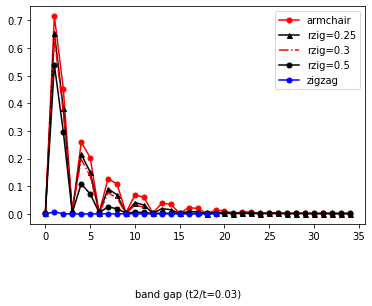

In [8]:
#plot
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath 
import functools

Nmax = 20
a=[0.0035967658189108966 ,
0.7151608605666187 ,
0.45251142751602536 ,
0.0039053993417190796 ,
0.25956194975712155 ,
0.2037947268779049 ,
0.0044504717227871705 ,
0.1278688791726622 ,
0.10755819432330811 ,
0.0038555309046598516 ,
0.06908613143791395 ,
0.0601891146884559 ,
0.0029995245099418578 ,
0.03871631606391093 ,
0.03453982604178178 ,
0.0021920392660692784 ,
0.022032114014086557 ,
0.02004035773865709 ,
0.0015368611822181074 ,
0.012617166444643944,
0.011682011315046169 ,
0.0010463707341089893 ,
0.007243070637624564 ,
0.006822266496679053 ,
0.0006971457133782527 ,
0.0041612591068831955 ,
0.003986638740045422 ,
0.0004568311648680024 ,
0.0023909680712209625 ,
0.002329858074881318 ,
0.00029546685279398596 ,
0.0013735702241103151 ,
0.0013614639683488744 ,
0.00018909307662641172 ,
0.0007888743745673786]

zaaa=[0.00356910010957326 ,
0.653502187795981 ,
0.38203275265537373 ,
0.012996521037615224 ,
0.21549860705542423 ,
0.15160815730198648 ,
0.0037305968334459204 ,
0.09103020016264346 ,
0.06852892268256425 ,
0.0013715976839438174 ,
0.04093803749636028 ,
0.03210020546580647 ,
0.0014823898186472886 ,
0.018807615579655428 ,
0.01523692485574411 ,
0.0014508773621979864 ,
0.008747071044446268 ,
0.00732218018655883 ,
0.001370903467323579 ,
0.004195973954293931 ,
0.0036579361100044358 ,
0.0013218837703639543 ,
0.0022486410049809284 ,
0.002074537630852493 ,
0.0013007769116085543 ,
0.001544075517403078 ,
0.0015024730269868056 ,
0.0012931545683304226 ,
0.001347605698322477 ,
0.0013404030701634545 ,
0.0012906715488393348 ,
0.0013021031406212369 ,
0.001301183830646304 ,
0.0012899149964883596 ,
0.0012922596420592526]

zaaazaazaa=[0.003053427852314982 ,
0.6354890059727739 ,
0.36711698878524274 ,
0.012598041725429963 ,
0.1973834939084958 ,
0.13675010838869534 ,
0.002049726396172768 ,
0.07679393505800752 ,
0.057029255074140826 ,
0.0007941245676296561 ,
0.031623402903378464 ,
0.024522872130674805]

za=[0.004833837008236206 ,
0.5389532538994148 ,
0.29716450539259387 ,
0.004388235709706446 ,
0.1087801924888549 ,
0.07200355699935408 ,
0.005036186467019683 ,
0.025351361849046468 ,
0.018499044584362398 ,
0.0027330242848475662 ,
0.006218492149194143 ,
0.005050106677335893 ,
0.0019264965701250815 ,
0.002257684503376463 ,
0.002148001312789286 ,
0.0017931012011826997 ,
0.0018057744181813069 ,
0.0018030245212770839 ,
0.001778309037708736 ,
0.0017783003849283579 ,
0.0017784593519060894 ,
0.001776906301678326 ,
0.0017768506048748325 ,
0.0017768794952551987 ,
0.0017767839453952392 ,
0.0017767768071618186 ,
0.0017767796524404906 ,
0.001776773862366079 ,
0.0017767731793949927 ,
0.0017767734117199638 ,
0.001776773066241846 ,
0.001776773008553356 ,
0.0017767730257418268 ,
0.0017767730054729278 ,
0.001776773000935887 ]

zz=[7.062314892915892e-17 ,
0.007174264961133629 ,
2.5557835480804303e-16 ,
2.564272623492591e-05 ,
1.9328767829417315e-16 ,
9.165507641627074e-08 ,
1.6500401886238875e-17 ,
3.2760290632586134e-10 ,
1.45759694228344e-16 ,
1.1705358890400096e-12 ,
5.4252869666573266e-17 ,
2.8018033506882426e-15 ,
1.5505470134911738e-17 ,
3.161296252561683e-16 ,
9.429718490152525e-17 ,
1.0113205221407442e-16 ,
9.89632528431927e-18 ,
2.8798887491641085e-16 ,
1.6624915097519603e-16 ,
2.513097267774033e-16 
]
plt.text(10,-0.3,'band gap (t2/t=0.03)')
#plt.text(-0.7,2.6,'Gap')
#plt.text(17,0.9,'N')
plt.plot(range(35),a,'r-o',markersize=5)
plt.plot(range(35),zaaa,'k-^',markersize=5)
plt.plot(range(12),zaaazaazaa,'r-.',markersize=5)
plt.plot(range(35),za,'k-o',markersize=5)
plt.plot(range(20),zz,'b-o',markersize=5)
plt.legend(['armchair','rzig=0.25','rzig=0.3','rzig=0.5', 'zigzag'])

plt.show()